#Introdução ao Surprise
http://surpriselib.com/



1.   dos ids dos usuários
2.   dos ids dos itens
3.   das avaliações dos usuários para esses itens



In [1]:
!pip install surprise

  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp38-cp38-win_amd64.whl size=719373 sha256=a0fef3d9c44de865d22a67fff6234a9c13781bcdc3ea28d96c5e80c134670377
  Stored in directory: c:\users\andre\appdata\local\pip\cache\wheels\20\91\57\2965d4cff1b8ac7ed1b6fa25741882af3974b54a31759e10b6
Successfully built scikit-surprise


ERROR: Could not install packages due to an EnvironmentError: [WinError 2] O sistema não pode encontrar o arquivo especificado: 'c:\\python38\\Scripts\\surprise.exe' -> 'c:\\python38\\Scripts\\surprise.exe.deleteme'

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import surprise
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split

In [3]:
notas = pd.read_csv('ratings.csv')
filmes = pd.read_csv('movies.csv')

In [4]:
notas.columns= ['id_usuario','id_filme','nota_usuario_filme','dia_da_avaliacao']
filmes.columns = ['id_filme','titulo','generos']

In [5]:
dados = filmes.merge(notas,on='id_filme')

In [6]:
dados = notas[['id_usuario','id_filme','nota_usuario_filme']]


In [7]:
reader = Reader(line_format='user item rating',rating_scale=(0.0,5.0))

In [8]:
data_suprise = surprise.Dataset.load_from_df(dados,reader)

In [9]:
trainset, testset = train_test_split(data_suprise)

#SVD e SVDpp ou SVD++

modelo matemático SVD

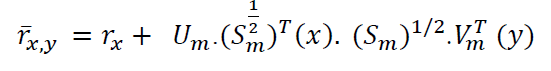

modelo matematico SVD++

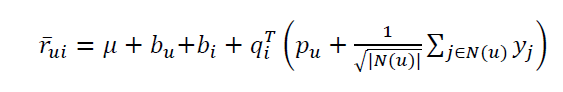

In [10]:
algo = surprise.SVDpp()

In [11]:
algo.fit(trainset)

In [ ]:
#predict idU idI

algo.predict(35,2571)


Prediction(uid=35, iid=2571, r_ui=None, est=4.611641795378047, details={'was_impossible': False})

In [ ]:
filmes_assistidos_alvo = notas.query('id_usuario == 35')['id_filme']
pd.DataFrame(filmes_assistidos_alvo)

,id_filme
5273,11
5274,21
5275,39
5276,50
5277,60
5278,62
5279,150
5280,185
5281,222
5282,231


In [ ]:
filmes_assistidos_alvo = notas[notas['id_usuario']==35]['id_filme']

In [ ]:
filmes.set_index('id_filme').loc[filmes_assistidos_alvo]

,titulo,generos
id_filme,,
11,"American President, The (1995)",Comedy|Drama|Romance
21,Get Shorty (1995),Comedy|Crime|Thriller
39,Clueless (1995),Comedy|Romance
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy
62,Mr. Holland's Opus (1995),Drama
150,Apollo 13 (1995),Adventure|Drama|IMAX
185,"Net, The (1995)",Action|Crime|Thriller
222,Circle of Friends (1995),Drama|Romance


11,"American President, The (1995)",Comedy|Drama|Romance

In [ ]:
ids_filmes_assistidos = filmes.set_index('id_filme').loc[filmes_assistidos_alvo].index
ids_filmes_assistidos

Int64Index([ 11,  21,  39,  50,  60,  62, 150, 185, 222, 231, 235, 236, 237,
            252, 261, 266, 300, 316, 339, 342, 590, 592, 595],
           dtype='int64', name='id_filme')

In [ ]:
filmes.drop(ids_filmes_assistidos).iloc[30:100]

,id_filme,titulo,generos
32,34,Babe (1995),Children|Drama
33,36,Dead Man Walking (1995),Crime|Drama
34,38,It Takes Two (1995),Children|Comedy
35,39,Clueless (1995),Comedy|Romance
36,40,"Cry, the Beloved Country (1995)",Drama
...,...,...,...
101,116,Anne Frank Remembered (1995),Documentary
102,117,"Young Poisoner's Handbook, The (1995)",Crime|Drama
103,118,If Lucy Fell (1996),Comedy|Romance
104,119,"Steal Big, Steal Little (1995)",Comedy


In [ ]:
algo.predict(35,117)

Prediction(uid=35, iid=117, r_ui=None, est=4.0131758160112945, details={'was_impossible': False})

In [ ]:
#vamos pensar em uma função que verifique os filmes que o alvo não assistiu e retorne os ids dos filmes
#com suas predições.
def filmes_assistidos_alvo(id_usuario):
  filmes_assistidos = notas[notas['id_usuario']==id_usuario]['id_filme']
  return filmes.set_index('id_filme').loc[filmes_assistidos]

In [ ]:
def filmes_nao_assistidos(id_usario):
  filmes_assistidos = notas[notas['id_usuario']==id_usario]['id_filme']
  return filmes.set_index('id_filme').drop(filmes_assistidos)

In [ ]:
filmes_nao_assistidos(35).head(5)

,titulo,generos
id_filme,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
filmes_assistidos_alvo(35).head(5)

,titulo,generos
id_filme,,
11,"American President, The (1995)",Comedy|Drama|Romance
21,Get Shorty (1995),Comedy|Crime|Thriller
39,Clueless (1995),Comedy|Romance
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy


In [ ]:
def verifica_predicoes_filmes(id_usuario):
  dic = []
  filmes_predicao = filmes_nao_assistidos(id_usuario).index
  for item in filmes_predicao:
    dic.append(algo.predict(id_usuario,item))
  return dic

In [ ]:
from collections import defaultdict

In [ ]:
algo.predict(35,1)

Prediction(uid=35, iid=1, r_ui=None, est=4.281995229629138, details={'was_impossible': False})

In [ ]:
def apresenta_recomendacoes(id_usuario):
  filmes_predicoes = defaultdict(list)
  predicoes_usuario = verifica_predicoes_filmes(id_usuario)
  for _,item,_,predicao,_ in predicoes_usuario:
    filmes_predicoes[item].append(predicao)
  
  ids_dos_filmes_predicao = pd.DataFrame.from_dict(filmes_predicoes,orient='index')
  ids_dos_filmes_predicao.columns = ['predicao']

  return ids_dos_filmes_predicao.join(filmes.set_index('id_filme')).dropna().sort_values('predicao',ascending=False).head(5)


In [ ]:
apresenta_recomendacoes(35)

,predicao,titulo,generos
1104,4.264714,"Streetcar Named Desire, A (1951)",Drama
858,4.214874,"Godfather, The (1972)",Crime|Drama
1193,4.115639,One Flew Over the Cuckoo's Nest (1975),Drama
6016,4.097679,City of God (Cidade de Deus) (2002),Action|Adventure|Crime|Drama|Thriller
1196,4.088539,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi


#Utilizando KNNBasic com Surprise

In [ ]:
from surprise import KNNBasic

In [ ]:
algo = KNNBasic()

In [ ]:
reader = Reader(line_format='user item rating',rating_scale=(0.0,5.0))

data_suprise = surprise.Dataset.load_from_df(dados,reader)

trainset, testset = train_test_split(data_suprise)

In [ ]:
sim_option = {'name':'pearson','user_based':True}

In [ ]:
algo = KNNBasic(sim_options=sim_option,verbonse=True)

In [ ]:
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [ ]:
algo.get_neighbors(25,k=5)

[589, 236, 388, 556, 354]

#Desafio prático - Utilizando a biblioteca Surprise:

1. Criar um menu para tentar inserir um novo usuário no dataframe de notas

*  pedir para indicar o id do filme e a sua avaliação

2. Possibilitar a chamada de funções filmes assistidos e filmes não assistidos para usuário informado via teclado.

3. Consultar catálogo de recomendações para o usuário.

